# SIR Model Simulation for Bucharest

In this project, I am simulating the spread of an infectious disease in Bucharest using the Susceptible-Infected-Recovered (SIR) model. This model helps in understanding how an infectious disease such as COVID-19 might spread through a population and the impact of different parameters on this spread.


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


## Importing Libraries

I'm using `numpy` for numerical operations, `scipy.integrate` for solving differential equations, and `matplotlib.pyplot` for plotting the results. These libraries provide the necessary tools to build and visualize the SIR model effectively.


In [3]:
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


## Defining the SIR Model

Here, I define the SIR model using a function `sir_model`. This function calculates the rate of change of Susceptible, Infected, and Recovered individuals in the population over time. It takes the current state `y` (comprising `S`, `I`, `R`), time `t`, total population `N`, transmission rate `beta`, and recovery rate `gamma` as inputs.


In [4]:
N = 1800000  # Bucharest's population
I0, R0 = 1000, 0  # 1,000 initially infected, none recovered
S0 = N - I0 - R0  # Rest of the population is susceptible
beta, gamma = 0.3, 1./10  # Estimated transmission and recovery rates


## Setting Initial Conditions

For the simulation, I've set the total population `N` to 1.8 million, reflecting the population of Bucharest. Initially, `I0` is 1,000, representing the initial number of infected individuals, and `R0` is 0 since no one has recovered yet. The rest of the population, `S0`, is susceptible. The `beta` and `gamma` values are estimates and can be adjusted to reflect different scenarios of disease spread and recovery.


In [5]:
t = np.linspace(0, 160, 160)  # Time grid for the simulation (in days)
y0 = S0, I0, R0  # Initial state of the population
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


## Solving the SIR Model Equations

In this section, I solve the SIR model equations over a period of 160 days. I use the `odeint` function from `scipy.integrate` to integrate the SIR model equations over time. The solution `ret` gives us the number of susceptible, infected, and recovered individuals at each time point in `t`.


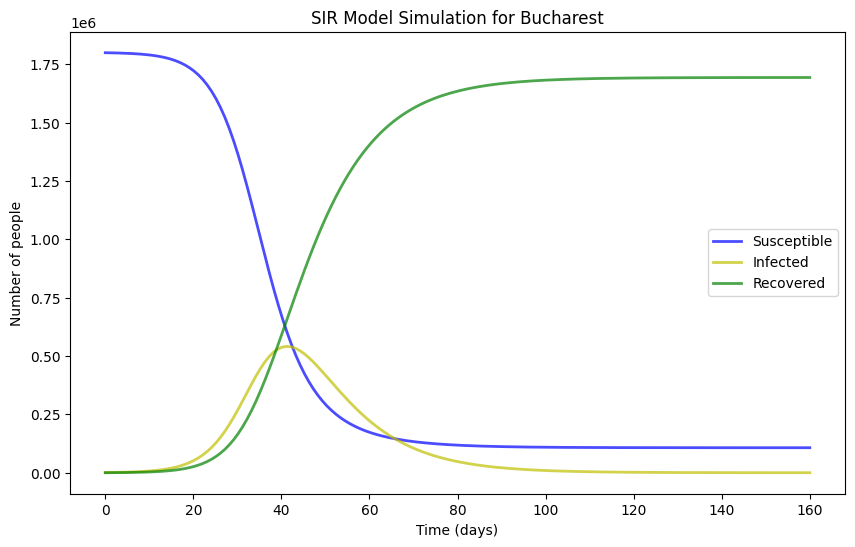

In [6]:
plt.figure(figsize=(10,6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.legend()
plt.title('SIR Model Simulation for Bucharest')
plt.show()


## Plotting the Results

The final step is to visualize the results of our simulation. This plot shows the number of susceptible, infected, and recovered individuals over the course of 160 days. It provides a clear visual representation of how the disease could potentially spread and then subside in Bucharest, given our model parameters and initial conditions.
